# Spectral Analysis of Deterministic Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Short-Time Fourier Transformation


The discrete Fourier transform (DFT) is not very well suited for the analysis of instationary signals when applied to the entire signal at once. Furthermore practical signals, for instance an antenna signal, cannot be analyzed in an on-line manner by the DFT. This motivates to split a long signal into segments and compute the DFT on these segments. This transformation is known as the [short-time Fourier transformation](https://en.wikipedia.org/wiki/Short-time_Fourier_transform) (STFT).

The STFT $X[\mu, n]$ of a signal $x[k]$ is defined as

\begin{equation}
X[\mu, n] = \sum_{k = n}^{n+N-1} x[k] \, w[k-n] \;  \mathrm{e}^{\,-\mathrm{j}\,\frac{2 \pi}{N} k \mu}
\end{equation}

where $w[k]$ denotes a window function of length $N$ which is normalized by $\sum_{k=0}^{N-1} w[k] = 1$. Starting from $k=n$, the signal $x[k]$ is windowed by $w[k]$ to a segment of length $N$. This windowed segment is then transformed by a DFT of length $N$.

The STFT has many applications in digital signal processing. For instance in the spectral analysis of signals or the processing of instationary signals. The resulting spectrum $X[\mu, n]$ depends on the frequency index $\mu$ and the time index $n$. The spectral domain is therefore also termed as [time-frequency domain](https://en.wikipedia.org/wiki/Time%E2%80%93frequency_representation) and techniques using the STFT as time-frequency processing.

The properties of the STFT depend on

* the length $N$ of the segments,
* the overlap between the segments, and
* the window function $w[k]$.

The size $N$ of the segments and the window function influence the spectral and temporal resolution of the STFT. The time index $n$ of the STFT can be increased by an arbitrary step size. The step size determines the overlap between two consecutive STFTs. For instance the spectra $X[\mu, n]$ and $X[\mu, n+1]$ have $N-1$ overlapping samples. The overlap is sometimes given as percentage of the segment length $N$.

## The Spectrogram

The magnitude $|X[\mu, n]|$ of the STFT is known as the [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) of a signal. It is frequently used to analyze signals in the time-frequency domain. For instance by a [spectrum analyzer](https://en.wikipedia.org/wiki/Spectrum_analyzer).

**Example**

The following example computes the spectrogram of a chirp/sweep signal.

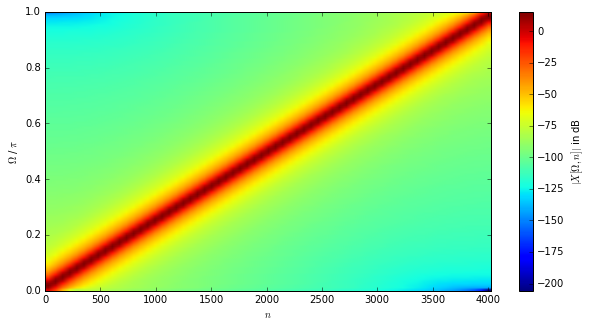

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


N = 8192  # length of the signal
L = 256  # length of one segment
overlap = 128  # overlap between segments


# generate signal
k = np.arange(N)
x = sig.chirp(k, 0, N, .5)

# compute and plot spectrogram
plt.figure(figsize = (10, 5))
plt.specgram(x, NFFT=L, noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$')
plt.ylabel(r'$\Omega$ / $\pi$')
cb = plt.colorbar()
cb.set_label(r'$|X[\Omega,n]|$ in dB')
plt.autoscale(tight=True)

**Exercise**

* Can you characterize the signal from its spectrogram? How would it sound like?
* Change the segment length `L` and the overlap `overlap` between segments. Rerun the example. What changes in the spectrogram?

**Example**

The following example computes the spectrogram of a speech signal containing a short sentence.

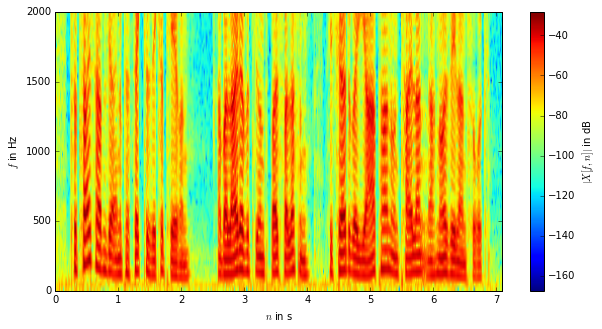

In [2]:
import soundfile as sf

L = 256  # length of one segment
overlap = 128  # overlap between segments

# read speech signal from file
x, fs = sf.read('../data/speech_8k.wav')
x = x/np.max(np.abs(x))

# compute and plot spectrogram
plt.figure(figsize = (10, 5))
plt.specgram(x, NFFT=L, Fs=fs, noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$ in s')
plt.ylabel(r'$f$ in Hz')
cb = plt.colorbar()
cb.set_label(r'$|X[f,n]|$ in dB')
plt.autoscale(tight=True)
plt.ylim([0, 2000]);

**Exercise**

* A speech signal exhibits a specific spectral structure. What insights can you gain from the spectrum above?
* Change the segment length and overlap of the STFT. How does the spectrogram change?

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016*.